## This is sample Python Code working with the National Water Model

In [4]:
import requests
import datetime as dt
import matplotlib.pyplot as plt

# This function will use a REST service to get a time series in
# WaterML format for a particular forecast at a specified reach id
def get_nwm_forecast(config, comid):
    url = 'https://appsdev.hydroshare.org/apps/nwm-forecasts/api/GetWaterML/?config=' + config + '&geom=channel_rt&variable=streamflow&COMID=' + comid + '&lon=-87.5658033081755&lat=33.2279708144365&startDate=2017-06-05&endDate=2017-06-05&time=00&lag=t00z'
    res = requests.get(url).content
    return str(res)


In [ ]:
# Initialize the arrays
dateraw = []
date = []
value = []

In [ ]:
# Call the web service to the the WaterML object in string format
comid ='10376192'
config = 'medium_range'
watermlstring = get_nwm_forecast(config, comid)

In [7]:
# View the contents
watermlstring

'b\'<?xml version="1.0" encoding="utf-8" ?>\\n<timeSeriesResponse xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.cuahsi.org/waterML/1.1/">\\n\\t<queryInfo><creationTime>2017-06-05</creationTime><criteria MethodCalled="GetWaterML"><parameter name="site" value="user defined" /><parameter name="variable" value="NWM Forecast" /></criteria></queryInfo>\\n\\t<timeSeries>\\n\\t\\t<sourceInfo xsi:type="SiteInfoType"><siteName>COMID: 10376192; Medium Range, Channel (streamflow). </siteName><siteCode network="National Water Model">Medium Range, Channel (streamflow). </siteCode><geoLocation><geogLocation xsi:type="LatLonPointType"><latitude></latitude><longitude></longitude></geogLocation></geoLocation><elevation_m>Unknown</elevation_m><verticalDatum>Unknown</verticalDatum></sourceInfo>\\n\\t\\t<variable><variableCode vocabulary="National Water Model" default="true" variableID="7" ></variableCode><variableName>Flow Forecast</variableName><valueType>Derived Value</valueTyp

In [8]:
# Split the WaterML string into a python list
waterml = watermlstring.split('dateTimeUTC="')
waterml

['b\'<?xml version="1.0" encoding="utf-8" ?>\\n<timeSeriesResponse xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns="http://www.cuahsi.org/waterML/1.1/">\\n\\t<queryInfo><creationTime>2017-06-05</creationTime><criteria MethodCalled="GetWaterML"><parameter name="site" value="user defined" /><parameter name="variable" value="NWM Forecast" /></criteria></queryInfo>\\n\\t<timeSeries>\\n\\t\\t<sourceInfo xsi:type="SiteInfoType"><siteName>COMID: 10376192; Medium Range, Channel (streamflow). </siteName><siteCode network="National Water Model">Medium Range, Channel (streamflow). </siteCode><geoLocation><geogLocation xsi:type="LatLonPointType"><latitude></latitude><longitude></longitude></geogLocation></geoLocation><elevation_m>Unknown</elevation_m><verticalDatum>Unknown</verticalDatum></sourceInfo>\\n\\t\\t<variable><variableCode vocabulary="National Water Model" default="true" variableID="7" ></variableCode><variableName>Flow Forecast</variableName><valueType>Derived Value</valueTy

In [9]:
# Get rid of everything at the top
waterml.pop(0)
waterml

['2017-06-05T09:00:00"  methodCode="1"  sourceCode="1"  qualityControlLevelCode="1" >710.1786</value>\\n\\t    \\n\\t\\t\\t<value censorCode="nc" dateTime="2017-06-05T12:00:00" timeOffset="0" ',
 '2017-06-05T12:00:00"  methodCode="1"  sourceCode="1"  qualityControlLevelCode="1" >1027.6578</value>\\n\\t    \\n\\t\\t\\t<value censorCode="nc" dateTime="2017-06-05T15:00:00" timeOffset="0" ',
 '2017-06-05T15:00:00"  methodCode="1"  sourceCode="1"  qualityControlLevelCode="1" >1452.1405</value>\\n\\t    \\n\\t\\t\\t<value censorCode="nc" dateTime="2017-06-05T18:00:00" timeOffset="0" ',
 '2017-06-05T18:00:00"  methodCode="1"  sourceCode="1"  qualityControlLevelCode="1" >1892.5148</value>\\n\\t    \\n\\t\\t\\t<value censorCode="nc" dateTime="2017-06-05T21:00:00" timeOffset="0" ',
 '2017-06-05T21:00:00"  methodCode="1"  sourceCode="1"  qualityControlLevelCode="1" >2371.029</value>\\n\\t    \\n\\t\\t\\t<value censorCode="nc" dateTime="2017-06-06T00:00:00" timeOffset="0" ',
 '2017-06-06T00:00:00"

In [ ]:
# Loop through list and extract the date value pairs. Date will be in raw format
for e in waterml:
    parser = e.split('"  methodCode="1"  sourceCode="1"  qualityControlLevelCode="1" >')
    dateraw.append(parser[0])
    value.append(parser[1].split('<')[0])

In [10]:
value

['710.1786',
 '1027.6578',
 '1452.1405',
 '1892.5148',
 '2371.029',
 '2739.3613',
 '2916.9942',
 '2999.9838',
 '3051.1901',
 '3166.6691',
 '3556.5434',
 '4124.757',
 '4318.6347',
 '4091.208',
 '3734.8827',
 '3447.7742',
 '3296.6272',
 '3281.7951',
 '3545.949',
 '3959.4842',
 '4077.7884',
 '3852.8338',
 '3536.7672',
 '3310.4',
 '3196.6866',
 '3203.7496',
 '3484.8546',
 '3974.3163',
 '4179.4947',
 '3983.8513',
 '3636.0015',
 '3336.1797',
 '3167.0223',
 '3105.5747',
 '3299.4524',
 '3704.8652',
 '3876.4946',
 '3696.3896',
 '3399.7462',
 '3179.7356',
 '3054.3684',
 '3038.4768',
 '3312.872',
 '3828.1135',
 '4088.0297',
 '3935.117',
 '3584.0889',
 '3259.1937',
 '3040.2425',
 '2918.4068',
 '2968.2005',
 '3215.7566',
 '3377.4979',
 '3294.1552',
 '3101.6901',
 '2918.4068',
 '2787.3893',
 '2697.3368',
 '2647.8962',
 '2653.1934',
 '2675.0885',
 '2659.9032',
 '2616.8193',
 '2571.2633',
 '2539.8332',
 '2516.8787',
 '2510.1689',
 '2545.4836',
 '2593.8647',
 '2597.7493',
 '2559.6095',
 '2517.585',
 '2

In [11]:
dateraw

['2017-06-05T09:00:00',
 '2017-06-05T12:00:00',
 '2017-06-05T15:00:00',
 '2017-06-05T18:00:00',
 '2017-06-05T21:00:00',
 '2017-06-06T00:00:00',
 '2017-06-06T03:00:00',
 '2017-06-06T06:00:00',
 '2017-06-06T09:00:00',
 '2017-06-06T12:00:00',
 '2017-06-06T15:00:00',
 '2017-06-06T18:00:00',
 '2017-06-06T21:00:00',
 '2017-06-07T00:00:00',
 '2017-06-07T03:00:00',
 '2017-06-07T06:00:00',
 '2017-06-07T09:00:00',
 '2017-06-07T12:00:00',
 '2017-06-07T15:00:00',
 '2017-06-07T18:00:00',
 '2017-06-07T21:00:00',
 '2017-06-08T00:00:00',
 '2017-06-08T03:00:00',
 '2017-06-08T06:00:00',
 '2017-06-08T09:00:00',
 '2017-06-08T12:00:00',
 '2017-06-08T15:00:00',
 '2017-06-08T18:00:00',
 '2017-06-08T21:00:00',
 '2017-06-09T00:00:00',
 '2017-06-09T03:00:00',
 '2017-06-09T06:00:00',
 '2017-06-09T09:00:00',
 '2017-06-09T12:00:00',
 '2017-06-09T15:00:00',
 '2017-06-09T18:00:00',
 '2017-06-09T21:00:00',
 '2017-06-10T00:00:00',
 '2017-06-10T03:00:00',
 '2017-06-10T06:00:00',
 '2017-06-10T09:00:00',
 '2017-06-10T12:

In [12]:
# Convert date to proper format
for e in dateraw:
    date.append(dt.datetime.strptime(e, "%Y-%m-%dT%H:%M:%S"))

In [13]:
date

[datetime.datetime(2017, 6, 5, 9, 0),
 datetime.datetime(2017, 6, 5, 12, 0),
 datetime.datetime(2017, 6, 5, 15, 0),
 datetime.datetime(2017, 6, 5, 18, 0),
 datetime.datetime(2017, 6, 5, 21, 0),
 datetime.datetime(2017, 6, 6, 0, 0),
 datetime.datetime(2017, 6, 6, 3, 0),
 datetime.datetime(2017, 6, 6, 6, 0),
 datetime.datetime(2017, 6, 6, 9, 0),
 datetime.datetime(2017, 6, 6, 12, 0),
 datetime.datetime(2017, 6, 6, 15, 0),
 datetime.datetime(2017, 6, 6, 18, 0),
 datetime.datetime(2017, 6, 6, 21, 0),
 datetime.datetime(2017, 6, 7, 0, 0),
 datetime.datetime(2017, 6, 7, 3, 0),
 datetime.datetime(2017, 6, 7, 6, 0),
 datetime.datetime(2017, 6, 7, 9, 0),
 datetime.datetime(2017, 6, 7, 12, 0),
 datetime.datetime(2017, 6, 7, 15, 0),
 datetime.datetime(2017, 6, 7, 18, 0),
 datetime.datetime(2017, 6, 7, 21, 0),
 datetime.datetime(2017, 6, 8, 0, 0),
 datetime.datetime(2017, 6, 8, 3, 0),
 datetime.datetime(2017, 6, 8, 6, 0),
 datetime.datetime(2017, 6, 8, 9, 0),
 datetime.datetime(2017, 6, 8, 12, 0),

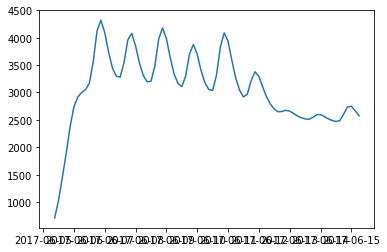

In [6]:
# Plot using matplotlib
fig= plt.plot(date, value)
plt.show()